
# Neuronske mreze


In [1]:
class XNode:
    def forward(self, a, b):
        self.a = a
        self.b = b
        c = a*b
        return c
    
    def backward(self, dc):
        da = self.b*dc
        db = self.a*dc
        return [da, db]
    
g = XNode()
print(g.forward(2,3))

6


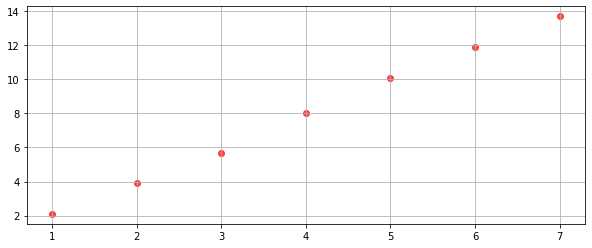

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([1, 2, 3, 4, 5, 6, 7]).astype(np.float32)
y = np.array([2.1, 3.9, 5.7, 8.01, 10.1, 11.9, 13.7]).astype(np.float32)

fig, (ax1) = plt.subplots(1, 1)
plt.subplots_adjust(wspace=.8)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7,c='r')
plt.grid()
plt.show()

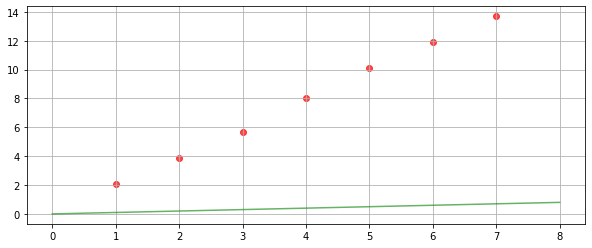

In [3]:
a = 0.1

fig, (ax1) = plt.subplots(1, 1)
plt.subplots_adjust(wspace=.8)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7,c='r')
line_x_range = (0, 8)
ax1.plot(line_x_range, [a*x for x in line_x_range], "g", alpha=0.6)
plt.grid()
plt.show()

1.9703518709399233


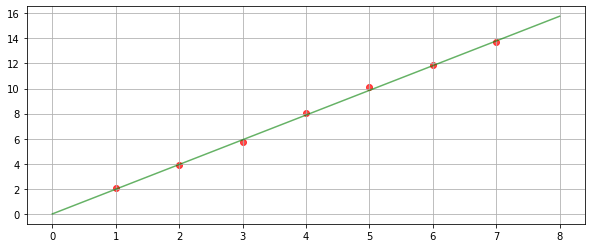

In [4]:
a = 0.1
g = XNode()
korak_ucenja = 0.01

# -------obucavanje -----------
# a = ?
for it in range(0, 1000):
    for i in range(0, len(x)):
        X = x[i]
        Y_ocekivano  = y[i]
        Y_izracunato = g.forward(X, a)
        greska = Y_izracunato - Y_ocekivano
        [dx, da]=g.backward(greska)
        a -= korak_ucenja*da
print(a)

# ----- grafikon ---------------
fig, (ax1) = plt.subplots(1, 1)
plt.subplots_adjust(wspace=.8)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7,c='r')

line_x_range = (0, 8)
ax1.plot(line_x_range, [a*x for x in line_x_range], "g", alpha=0.6)
plt.grid()
plt.show()

In [5]:
class ANode:
    def forward(self, a, b):
        self.a = a
        self.b = b
        c = a+b
        return c
    
    def backward(self, dc):
        da = 1*dc
        db = 1*dc
        return [da, db]
    
h = ANode()
print(h.forward(2,3)) 

5


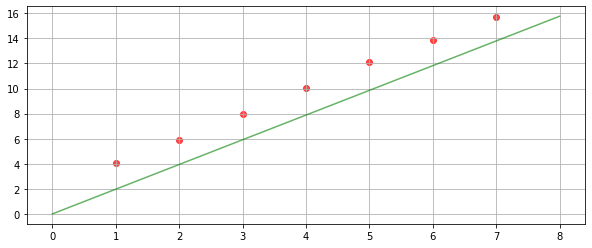

In [6]:
x = np.array([1, 2, 3, 4, 5, 6, 7]).astype(np.float32)
y = np.array([4.1, 5.9, 7.95, 10.01, 12.1, 13.9, 15.7]).astype(np.float32)

fig, (ax1) = plt.subplots(1, 1)
plt.subplots_adjust(wspace=.8)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7,c='r')

line_x_range = (0, 8)
ax1.plot(line_x_range, [a*x for x in line_x_range], "g", alpha=0.6)
plt.grid()

plt.show()

1.7411116009665724 3.066652549304821


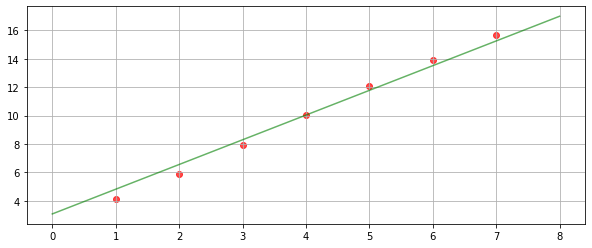

In [7]:
a = 0.1
b = 0.1
korak_ucenja = 0.01
g = XNode()
h = ANode()

# obucavanje
# a = ? i b = ?
for it in range(0, 100):
    for i in range(0, len(x)):
        X = x[i]
        Y_ocekivano = y[i]
        # napred
        G = g.forward(X, a)
        Y_izracunato = h.forward(G, b)
        # nazad
        greska = Y_ocekivano - Y_izracunato        
        [dg, db] = h.backward(greska)
        [da, dx] = g.backward(dg)
        # korekcije
        a += korak_ucenja*da
        b += korak_ucenja*db
print(a, b)

fig, (ax1) = plt.subplots(1, 1)
plt.subplots_adjust(wspace=.8)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7,c='r')
line_x_range = (0, 8)
ax1.plot(line_x_range, [a*x+b for x in line_x_range], "g", alpha=0.6)
plt.grid()
plt.show()